## Text Mining and NLP

## Part 2

### Situation:

Priya works at an international PR firm in the Europe division. Their largest client has offices in Ibiza, Madrid, and Las Palmas. She needs to keep her boss aware of current events and provide a weekly short list of articles concerning political events in Spain. The problem is, this takes hours every week to review articles on the BBC and Priya is very busy! She wonders if she could automate this process using text mining to save her time.

### **Goal**: to internalize the steps, challenges, and methodology of text mining
- explore text analysis by hand
- apply text mining steps in Jupyter with Python libraries NLTK
- classify documents correctly

In [13]:
import re
import nltk
from nltk.stem import *
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dryanmiller/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
string_ = "Sony PSP tipped as a 'must-have' Sony's Playstation Portable is the top gadget for 2005, according to a round-up of ultimate gizmos compiled by Stuff Magazine. \
It beats the iPod into second place in the Top Ten Essentials list which predicts what gadget-lovers are likely to covet this year. Owning all 10 gadgets will set the gadget lover back £7,455. That is £1,000 cheaper than last year's list due to falling manufacturing costs making gadgets more affordable. \
Portable gadgets dominate the list, including Sharp's 902 3G mobile phone, the Pentax Optio SV digital camera and Samsung's Yepp YH-999 video jukebox. What this year's Essentials shows is that gadgets are now cheaper, sexier and more indispensable than ever. We've got to the point where we can't live our lives without certain technology, \
said Adam Vaughan, editor of Stuff Essentials. The proliferation of gadgets in our homes is inexorably altering the role of the high street in our lives thinks Mr Vaughan. \
Take digital cameras, who would now pay to develop an entire film of photos? Or legitimate downloads, who would travel miles to a record shop when they could download the song in minutes for 70p? \
he asks. Next year will see a new set of technologies capturing the imaginations of gadget lovers, Stuff predicts. The Xbox 2, high-definition TV and MP3 mobiles will be among the list of must-haves that will dominate 2006, it says. The spring launch of the PSP in the UK is eagerly awaited by gaming fans."



In [4]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
string_raw = nltk.regexp_tokenize(string_, pattern)
print(string_raw[:100])

['Sony', 'PSP', 'tipped', 'as', 'a', 'must', 'have', "Sony's", 'Playstation', 'Portable', 'is', 'the', 'top', 'gadget', 'for', 'according', 'to', 'a', 'round', 'up', 'of', 'ultimate', 'gizmos', 'compiled', 'by', 'Stuff', 'Magazine', 'It', 'beats', 'the', 'iPod', 'into', 'second', 'place', 'in', 'the', 'Top', 'Ten', 'Essentials', 'list', 'which', 'predicts', 'what', 'gadget', 'lovers', 'are', 'likely', 'to', 'covet', 'this', 'year', 'Owning', 'all', 'gadgets', 'will', 'set', 'the', 'gadget', 'lover', 'back', 'That', 'is', 'cheaper', 'than', 'last', "year's", 'list', 'due', 'to', 'falling', 'manufacturing', 'costs', 'making', 'gadgets', 'more', 'affordable', 'Portable', 'gadgets', 'dominate', 'the', 'list', 'including', "Sharp's", 'G', 'mobile', 'phone', 'the', 'Pentax', 'Optio', 'SV', 'digital', 'camera', 'and', "Samsung's", 'Yepp', 'YH', 'video', 'jukebox', 'What', 'this']


In [5]:
string_tokens = [i.lower() for i in string_raw]
print(string_tokens[:100])



['sony', 'psp', 'tipped', 'as', 'a', 'must', 'have', "sony's", 'playstation', 'portable', 'is', 'the', 'top', 'gadget', 'for', 'according', 'to', 'a', 'round', 'up', 'of', 'ultimate', 'gizmos', 'compiled', 'by', 'stuff', 'magazine', 'it', 'beats', 'the', 'ipod', 'into', 'second', 'place', 'in', 'the', 'top', 'ten', 'essentials', 'list', 'which', 'predicts', 'what', 'gadget', 'lovers', 'are', 'likely', 'to', 'covet', 'this', 'year', 'owning', 'all', 'gadgets', 'will', 'set', 'the', 'gadget', 'lover', 'back', 'that', 'is', 'cheaper', 'than', 'last', "year's", 'list', 'due', 'to', 'falling', 'manufacturing', 'costs', 'making', 'gadgets', 'more', 'affordable', 'portable', 'gadgets', 'dominate', 'the', 'list', 'including', "sharp's", 'g', 'mobile', 'phone', 'the', 'pentax', 'optio', 'sv', 'digital', 'camera', 'and', "samsung's", 'yepp', 'yh', 'video', 'jukebox', 'what', 'this']


In [8]:
stop_words = set(stopwords.words('english'))
string_tokens_stopped = [w for w in string_tokens if not w in stop_words]
print(string_tokens_stopped[:100])

['sony', 'psp', 'tipped', 'must', "sony's", 'playstation', 'portable', 'top', 'gadget', 'according', 'round', 'ultimate', 'gizmos', 'compiled', 'stuff', 'magazine', 'beats', 'ipod', 'second', 'place', 'top', 'ten', 'essentials', 'list', 'predicts', 'gadget', 'lovers', 'likely', 'covet', 'year', 'owning', 'gadgets', 'set', 'gadget', 'lover', 'back', 'cheaper', 'last', "year's", 'list', 'due', 'falling', 'manufacturing', 'costs', 'making', 'gadgets', 'affordable', 'portable', 'gadgets', 'dominate', 'list', 'including', "sharp's", 'g', 'mobile', 'phone', 'pentax', 'optio', 'sv', 'digital', 'camera', "samsung's", 'yepp', 'yh', 'video', 'jukebox', "year's", 'essentials', 'shows', 'gadgets', 'cheaper', 'sexier', 'indispensable', 'ever', "we've", 'got', 'point', "can't", 'live', 'lives', 'without', 'certain', 'technology', 'said', 'adam', 'vaughan', 'editor', 'stuff', 'essentials', 'proliferation', 'gadgets', 'homes', 'inexorably', 'altering', 'role', 'high', 'street', 'lives', 'thinks', 'mr'

In [11]:
stemmer = SnowballStemmer("english")
string_tokens_stemmed = [stemmer.stem(token) for token in string_tokens_stopped]
print(string_tokens_stemmed[:100])

['soni', 'psp', 'tip', 'must', 'soni', 'playstat', 'portabl', 'top', 'gadget', 'accord', 'round', 'ultim', 'gizmo', 'compil', 'stuff', 'magazin', 'beat', 'ipod', 'second', 'place', 'top', 'ten', 'essenti', 'list', 'predict', 'gadget', 'lover', 'like', 'covet', 'year', 'own', 'gadget', 'set', 'gadget', 'lover', 'back', 'cheaper', 'last', 'year', 'list', 'due', 'fall', 'manufactur', 'cost', 'make', 'gadget', 'afford', 'portabl', 'gadget', 'domin', 'list', 'includ', 'sharp', 'g', 'mobil', 'phone', 'pentax', 'optio', 'sv', 'digit', 'camera', 'samsung', 'yepp', 'yh', 'video', 'jukebox', 'year', 'essenti', 'show', 'gadget', 'cheaper', 'sexier', 'indispens', 'ever', "we'v", 'got', 'point', "can't", 'live', 'live', 'without', 'certain', 'technolog', 'said', 'adam', 'vaughan', 'editor', 'stuff', 'essenti', 'prolifer', 'gadget', 'home', 'inexor', 'alter', 'role', 'high', 'street', 'live', 'think', 'mr']


In [14]:
string_freqdist = FreqDist(string_tokens_stemmed)

In [15]:
string_freqdist.most_common(50)

[('gadget', 9),
 ('list', 4),
 ('year', 4),
 ('stuff', 3),
 ('essenti', 3),
 ('lover', 3),
 ('live', 3),
 ('soni', 2),
 ('psp', 2),
 ('must', 2),
 ('portabl', 2),
 ('top', 2),
 ('predict', 2),
 ('set', 2),
 ('cheaper', 2),
 ('domin', 2),
 ('mobil', 2),
 ('digit', 2),
 ('camera', 2),
 ('technolog', 2),
 ('vaughan', 2),
 ('high', 2),
 ('would', 2),
 ('download', 2),
 ('tip', 1),
 ('playstat', 1),
 ('accord', 1),
 ('round', 1),
 ('ultim', 1),
 ('gizmo', 1),
 ('compil', 1),
 ('magazin', 1),
 ('beat', 1),
 ('ipod', 1),
 ('second', 1),
 ('place', 1),
 ('ten', 1),
 ('like', 1),
 ('covet', 1),
 ('own', 1),
 ('back', 1),
 ('last', 1),
 ('due', 1),
 ('fall', 1),
 ('manufactur', 1),
 ('cost', 1),
 ('make', 1),
 ('afford', 1),
 ('includ', 1),
 ('sharp', 1)]

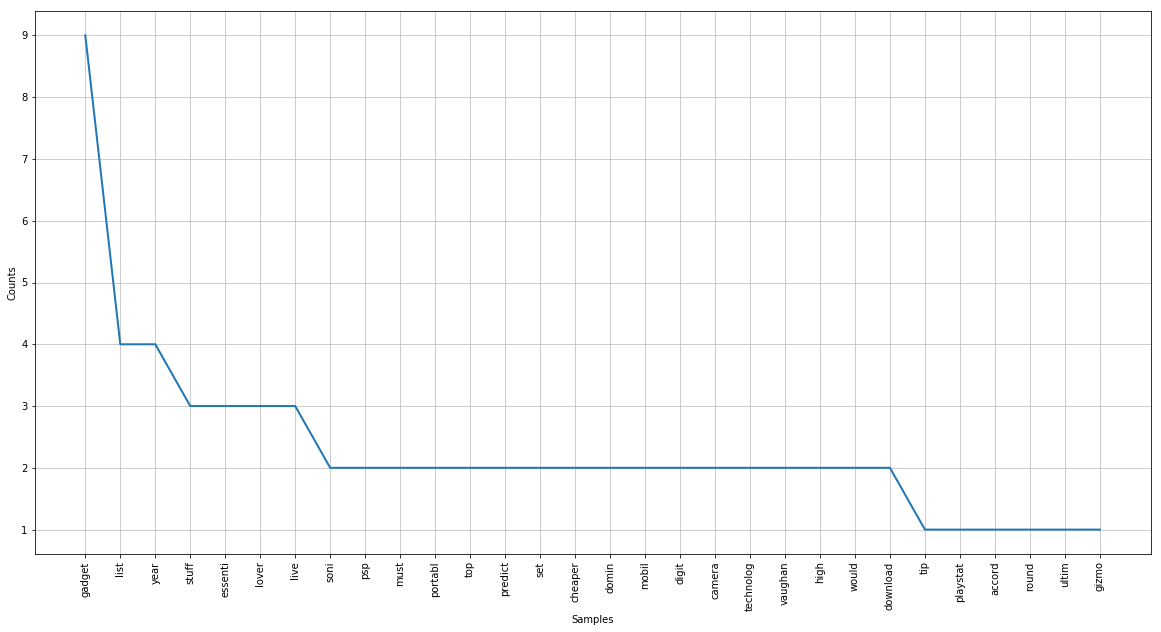

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
string_freqdist.plot(30,cumulative=False)

## Refresher on cleaning text
![gif](https://www.nyfa.edu/student-resources/wp-content/uploads/2014/10/furious-crazed-typing.gif)


In [21]:
from __future__ import print_function
import nltk
import sklearn


#from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer

url_a = "https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/A.txt"
url_b = "https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/B.txt"
article_a = urllib.request.urlopen(url_a).read()
article_a_st = article_a.decode("utf-8")


In [22]:
# tokens
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
arta_tokens_raw = nltk.regexp_tokenize(article_a_st, pattern)

# lower case
arta_tokens = [i.lower() for i in arta_tokens_raw]

# stop words
from nltk.corpus import stopwords
stopwords.words("english")

stop_words = set(stopwords.words('english'))
arta_tokens_stopped = [w for w in arta_tokens if not w in stop_words]

# stem words
stemmer = SnowballStemmer("english")
arta_stemmed = [stemmer.stem(word) for word in arta_tokens_stopped]

In [23]:
# repeat w second article
article_b = urllib.request.urlopen(url_b).read()
article_b_st = article_b.decode("utf-8")
artb_tokens_raw = nltk.regexp_tokenize(article_b_st, pattern)
artb_tokens = [i.lower() for i in artb_tokens_raw]
artb_tokens_stopped = [w for w in artb_tokens if not w in stop_words]
artb_stemmed = [stemmer.stem(word) for word in artb_tokens_stopped]

### Document statistics

what's wrong with the table from yesterday? what does it not consider?


### Document Frequency (DF)

$\begin{align}
 tf_{i,j} = \dfrac{n_{i,j}}{\displaystyle \sum_k n_{i,j} }
\end{align} $

### Inverse Document Frequency (IDF)

$\begin{align}
idf(w) = \log \dfrac{N}{df_t}
\end{align} $

### DF-IDF score

$ \begin{align}
w_{i,j} = tf_{i,j} \times \log \dfrac{N}{df_i} \\
tf_{i,j} = \text{number of occurences of } i \text{ in} j \\
df_i = \text{number of documents containing} i \\
N = \text{total number of documents}
\end{align} $


### The from scratch method
![homemade](https://media2.giphy.com/media/LBZcXdG0eVBdK/giphy.gif?cid=3640f6095c2d7bb2526a424a4d97117c)


Please go through the code and comment what each section does

In [24]:
wordSet = set(arta_stemmed).union(set(artb_stemmed)) #Identifying the unique words in arta and artb and then finding the union between the two sets
wordDictA = dict.fromkeys(wordSet, 0) #creates a dictionary where the keys are the values in wordSet and the values are set to 0.
wordDictB = dict.fromkeys(wordSet, 0) #creates a dictionary where the keys are the values in wordSet and the values are set to 0.

for word in arta_stemmed:  #Calculates the word counts for arta
    wordDictA[word]+=1
    
for word in artb_stemmed: #Calculates the word counts for arta
    wordDictB[word]+=1    

def computeTF(wordDict, bow): #creates function to calculate TF
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

tfbowA = computeTF(wordDictA,arta_stemmed) #calculates TF for arta
tfbowB = computeTF(wordDictB,artb_stemmed) #calculates TF for artb

In [25]:
tfbowA

{'fund': 0.0,
 'comput': 0.021739130434782608,
 'juri': 0.010869565217391304,
 'decis': 0.005434782608695652,
 'use': 0.005434782608695652,
 'larg': 0.005434782608695652,
 'oppon': 0.005434782608695652,
 'final': 0.0,
 'base': 0.010869565217391304,
 'vocal': 0.005434782608695652,
 'mep': 0.010869565217391304,
 'agre': 0.0,
 'lobbi': 0.005434782608695652,
 'firm': 0.010869565217391304,
 'issu': 0.005434782608695652,
 'announc': 0.0,
 'eu': 0.021739130434782608,
 'vote': 0.005434782608695652,
 'legal': 0.016304347826086956,
 'problem': 0.0,
 'direct': 0.021739130434782608,
 'two': 0.010869565217391304,
 'intens': 0.005434782608695652,
 'believ': 0.0,
 'commiss': 0.005434782608695652,
 'method': 0.005434782608695652,
 'financi': 0.005434782608695652,
 'rewrit': 0.005434782608695652,
 'intend': 0.005434782608695652,
 'submit': 0.005434782608695652,
 'read': 0.005434782608695652,
 'intern': 0.0,
 'adopt': 0.005434782608695652,
 'invent': 0.02717391304347826,
 'reject': 0.005434782608695652,

In [27]:
def computeIDF(docList): #creates function for calculating IDF
    import math #imports the math package
    idfDict = {} #creates an empty dictionary
    N = len(docList) #assigns the length of docList to N
    
    idfDict = dict.fromkeys(docList[0].keys(), 0) #creates a new dictionary with the keys from docList and values of 0
    for doc in docList: #starts a for loop 
        for word, val in doc.items(): #starts a 
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [28]:
idfs = computeIDF([wordDictA, wordDictB]) #computes IDF for wordDictA and wordDictB

In [29]:
def computeTFIDF(tfBow, idfs): #creates function for calculating TF-IDF
    tfidf = {} #creates empty dictionary
    for word, val in tfBow.items(): #creates for loop with the keys and values from the tfBow dictionary
        tfidf[word] = val*idfs[word] #for each word in tfBow, the value is multiplied by the idfs for the word. The word and resulting calculation are then added to the dictionary tfidf.
    return tfidf #returns the tfidf dictionary

In [30]:
tfidfBowA = computeTFIDF(tfbowA, idfs) #calculates TF-IDF for arta
tfidfBowB = computeTFIDF(tfbowB, idfs) #calculates TF-IDF for artb

In [31]:
import pandas as pd # imports pandas
pd.DataFrame([tfidfBowA, tfidfBowB]) #converts tfidfBowA and tfidfBowB into a single pandas dataframe

,abstain,achiev,action,adopt,affair,affect,agre,agreement,also,amazon,...,vocal,vote,wealthi,week,welcom,without,word,world,would,year
0,0.001636,0.001636,0.001636,0.001636,0.001636,0.000000,0.000000,0.000000,0.000000,0.001636,...,0.001636,0.001636,0.000000,0.000000,0.001636,0.001636,0.001636,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.002923,0.002923,0.002923,0.005845,0.000000,...,0.000000,0.000000,0.002923,0.002923,0.000000,0.000000,0.000000,0.002923,0.0,0.002923


## But yes, there is an easier way

![big deal](https://media0.giphy.com/media/xUA7aQOxkz00lvCAOQ/giphy.gif?cid=3640f6095c2d7c51772f47644d09cc8b)


In [32]:
# create a string again
cleaned_a = ' '.join(arta_stemmed)
cleaned_b = ' '.join(artb_stemmed)


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
response = tfidf.fit_transform([cleaned_a, cleaned_b])

import pandas as pd
df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names())
print(df)

    abstain    achiev    action     adopt    affair    affect      agre  \
0  0.053285  0.053285  0.053285  0.053285  0.053285  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.084167  0.084167   

   agreement      also    amazon  ...     vocal      vote   wealthi      week  \
0   0.000000  0.000000  0.053285  ...  0.053285  0.053285  0.000000  0.000000   
1   0.084167  0.168334  0.000000  ...  0.000000  0.000000  0.084167  0.084167   

     welcom   without      word     world     would      year  
0  0.053285  0.053285  0.053285  0.000000  0.113738  0.000000  
1  0.000000  0.000000  0.000000  0.084167  0.059885  0.084167  

[2 rows x 200 columns]


## Corpus Statistics 

How many non-zero elements are there?
- Adapt the code below, using the `df` version of the `response` object to replace everywhere below it says `DATA`
- Interpret the findings


In [68]:
# Edit code before running it
import numpy as np
newval = np.array(df)
non_zero_cells =  np.count_nonzero(newval)/ float(df.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cells / float(df.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 103.5
Percentage of columns containing 0: 0.48250000000000004


### Next Steps:
- Create the tf-idf for the **whole** corpus of 12 articles
- What are _on average_ the most important words in the whole corpus?
- Add a column named "Target" to the dataset
- Target will be set to 1 or 0 if the article is "Politics" or "Not Politics"
- Do some exploratory analysis of the dataset
 - what are the average most important words for the "Politics" articles?
 - What are the average most important words for the "Not Politics"?

In [69]:
ending = ['A.txt', 'B.txt', 'C.txt', 'D.txt', 'E.txt', 'F.txt', 'G.txt', 'H.txt', 'I.txt', 'J.txt', 'K.txt', 'L.txt']
urls =[]
for end in ending:
    urls.append('https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/'+ end)
urls

['https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/A.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/B.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/C.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/D.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/E.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/F.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/G.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/H.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/I.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/J.txt',


In [70]:
import requests
texts = []
for url in urls:
    texts.append(requests.get(url).text)

In [75]:
texts[0]

'Reboot ordered for EU patent law\n\nA European Parliament committee has ordered a rewrite of the proposals for controversial new European Union rules which govern computer-based inventions.\n\nThe Legal Affairs Committee (JURI) said the Commission should re-submit the Computer Implemented Inventions Directive after MEPs failed to back it. It has had vocal critics who say it could favour large over small firms and impact open-source software innovation. Supporters say it would let firms protect their inventions. The directive is intended to offer patent protection to inventions that use software to achieve their effect, in other words, "computer implemented invention". The draft law suffered setbacks when Poland, one of the largest EU member states, rejected its adoption twice in two months. Intense lobbying on the issue has started to gain momentum in some national parliaments putting them under immense pressure. Only two MEPs backed the draft law at the JURI meeting, with one voting 

In [102]:
def clean_tokenize(string):
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    string= string.lower()
    string_tokens = nltk.regexp_tokenize(string, pattern)
    stop_words = set(stopwords.words('english'))
    string_tokens_stopped = [w for w in string_tokens if not w in stop_words]
    stemmer = SnowballStemmer("english")
    string_tokens_stemmed = [stemmer.stem(token) for token in string_tokens_stopped]
    string_freqdist = FreqDist(string_tokens_stemmed)
    return string_freqdist.most_common(1)

[('patent', 5)]

In [105]:
for i in range(len(texts)):
    print(clean_tokenize(texts[i]))
    

[('patent', 5)]
[('deal', 4)]
[('gadget', 9)]
[('arrest', 9)]
[('fbi', 8)]
[("o'sullivan", 5)]
[('sec', 8)]
[('duchi', 7)]
[('user', 10)]
[('world', 6)]
[('immigr', 7)]
[('world', 7)]


## Lets talk classification
- How would you split into train and test? what would be the dataset?

In [ ]:
# Sample code
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)  